In [25]:
import numpy as np
import pycbc.conversions as pc
import pycbc.pnutils as pnu
import pandas as pd
import h5py, os

from collections import defaultdict

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import random

import sys
from lal import YRJUL_SI

import seaborn as sns

import ast

In [26]:
def save_dict_to_hdf5(dic, filename):
    """
    ....
    """
    with h5py.File(filename, 'w') as h5file:
        recursively_save_dict_contents_to_group(h5file, '/', dic)

def recursively_save_dict_contents_to_group(h5file, path, dic):
    """
    ....
    """
    for key, item in dic.items():
        if isinstance(item, (np.ndarray, np.int64, np.float64, str, bytes)):
            h5file[path + key] = item
        elif isinstance(item, dict):
            recursively_save_dict_contents_to_group(h5file, path + key + '/', item)
        else:
            raise ValueError('Cannot save %s type'%type(item))

def load_dict_from_hdf5(filename):
    """
    ....
    """
    with h5py.File(filename, 'r') as h5file:
        return recursively_load_dict_contents_from_group(h5file, '/')

def recursively_load_dict_contents_from_group(h5file, path):
    """
    ....
    """
    ans = {}
    for key, item in h5file[path].items():
        if isinstance(item, h5py._hl.dataset.Dataset):
            ans[key] = item[()]
        elif isinstance(item, h5py._hl.group.Group):
            ans[key] = recursively_load_dict_contents_from_group(h5file, path + key + '/')
            
    return ans


def print_some_rcParams():
    rc_keys = ['backend', 'axes.labelsize', 'axes.titlesize', 'font.size',
        'legend.fontsize', 'xtick.labelsize', 'ytick.labelsize', 'font.family',
        'text.usetex', 'figure.figsize'] # 'font.sans-serif', 'font.serif'
    print('Using the following matplotlib settings:')
    for k in rc_keys:
        print(k, ':', plt.rcParams[k])

In [27]:
ifar_threshold = 10 ## yr 
number_injection = 10

In [28]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_columns', None)

In [29]:
#This is the first file, all events are true
injection_file = '/home/bhooshan.gadre/work/O3/sub_solar_search/O3B_VTs/ssm-search/O3b_VTs/common_ssm_injections.hdf'
injections = load_dict_from_hdf5(injection_file)
injections.keys(), len(injections.keys())

(dict_keys(['coa_phase', 'declination', 'distance', 'gstlal_ifar', 'gstlal_weight', 'inclination', 'mass1_source', 'mass2_source', 'mbta_ifar', 'polarization', 'pycbc_ifar', 'right_ascension', 'snr_H', 'snr_L', 'snr_V', 'spin1x', 'spin1y', 'spin1z', 'spin2x', 'spin2y', 'spin2z', 'time']),
 22)

In [30]:
df_true = pd.DataFrame(injections)
df_true

,coa_phase,declination,distance,gstlal_ifar,gstlal_weight,inclination,mass1_source,mass2_source,mbta_ifar,polarization,pycbc_ifar,right_ascension,snr_H,snr_L,snr_V,spin1x,spin1y,spin1z,spin2x,spin2y,spin2z,time
0,1.463821,-1.232698,231.483117,0.0,0.666667,2.867627,1.692460,0.501600,0.0,2.515262,0.0,0.164688,2.440571,2.957571,1.361124,0.053696,0.053141,-0.037187,0.057080,-0.011039,0.007150,1.238166e+09
1,0.673478,-0.622410,458.599031,0.0,1.000000,0.918732,6.421466,0.763863,0.0,0.135494,0.0,2.177941,2.684150,2.988815,1.259368,-0.025080,-0.011637,0.021298,0.020269,0.071086,0.038439,1.238166e+09
2,5.447231,-1.440067,302.357273,0.0,0.666667,0.854144,10.481894,1.045793,0.0,0.132165,0.0,2.621765,4.408046,6.731172,1.315282,-0.004171,-0.046270,0.012784,0.021928,-0.027524,-0.030501,1.238166e+09
3,5.521864,-1.276307,463.341251,0.0,0.666667,0.494481,8.906005,0.811978,0.0,1.828451,0.0,3.177169,2.049177,3.539541,0.762279,0.000633,0.001265,-0.000504,0.004547,-0.011592,-0.004068,1.238166e+09
4,0.183151,-0.734805,833.927353,0.0,1.000000,2.895566,7.129897,0.808812,0.0,2.805147,0.0,2.219308,2.389652,3.215351,0.549881,-0.051269,0.011986,-0.001127,-0.021172,0.014852,-0.003302,1.238166e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1916578,0.187059,-0.469964,752.284246,0.0,1.000000,0.388063,5.784159,0.559250,0.0,3.122078,0.0,4.757083,2.959844,2.958614,0.812961,-0.032232,0.036856,-0.038265,-0.001476,0.035159,-0.032295,1.269562e+09
1916579,0.141624,-0.272180,643.259480,0.0,0.666667,3.032152,8.621294,0.868851,0.0,0.817515,0.0,1.586071,2.718237,3.586084,3.759479,-0.007036,-0.019932,0.032837,-0.038478,0.020862,-0.010397,1.269562e+09
1916580,1.174031,-0.227858,349.130344,0.0,0.666667,2.206089,10.560706,0.717379,0.0,1.318691,0.0,3.475683,3.402718,2.469075,1.012893,0.004500,-0.054032,-0.029833,0.062644,0.023295,-0.031378,1.269562e+09
1916581,5.752044,0.708430,455.222188,0.0,1.000000,2.115026,5.727628,0.886952,0.0,1.553802,0.0,2.464774,2.854940,3.862371,0.634093,-0.028952,-0.016063,-0.024699,-0.048624,-0.022375,0.007844,1.269562e+09


In [31]:
df_true = df_true.drop(columns=['coa_phase', 'declination', 'distance', 'gstlal_ifar', 'gstlal_weight', 'inclination', 'mbta_ifar', 'polarization', 
                                'right_ascension', 'spin1x', 'spin1y', 'spin2x', 'spin2y', 'time'])


df_true = df_true.rename(columns={'mass2_source': 'mass2', 
                                  'mass1_source': 'mass1',
                                  'snr_H': 'snr_H1',
                                  'snr_L': 'snr_L1',
                                  'snr_V': 'snr_V1'
                                 })
#df_true['label'] = 1

df_true

,mass1,mass2,pycbc_ifar,snr_H1,snr_L1,snr_V1,spin1z,spin2z
0,1.692460,0.501600,0.0,2.440571,2.957571,1.361124,-0.037187,0.007150
1,6.421466,0.763863,0.0,2.684150,2.988815,1.259368,0.021298,0.038439
2,10.481894,1.045793,0.0,4.408046,6.731172,1.315282,0.012784,-0.030501
3,8.906005,0.811978,0.0,2.049177,3.539541,0.762279,-0.000504,-0.004068
4,7.129897,0.808812,0.0,2.389652,3.215351,0.549881,-0.001127,-0.003302
...,...,...,...,...,...,...,...,...
1916578,5.784159,0.559250,0.0,2.959844,2.958614,0.812961,-0.038265,-0.032295
1916579,8.621294,0.868851,0.0,2.718237,3.586084,3.759479,0.032837,-0.010397
1916580,10.560706,0.717379,0.0,3.402718,2.469075,1.012893,-0.029833,-0.031378
1916581,5.727628,0.886952,0.0,2.854940,3.862371,0.634093,-0.024699,0.007844


In [32]:
opt_snr = df_true['snr_H1']**2. + df_true['snr_L1']**2. + df_true['snr_V1']**2. 
df_true['opt_snr'] = np.sqrt(opt_snr) 
df_true

,mass1,mass2,pycbc_ifar,snr_H1,snr_L1,snr_V1,spin1z,spin2z,opt_snr
0,1.692460,0.501600,0.0,2.440571,2.957571,1.361124,-0.037187,0.007150,4.068939
1,6.421466,0.763863,0.0,2.684150,2.988815,1.259368,0.021298,0.038439,4.209951
2,10.481894,1.045793,0.0,4.408046,6.731172,1.315282,0.012784,-0.030501,8.152884
3,8.906005,0.811978,0.0,2.049177,3.539541,0.762279,-0.000504,-0.004068,4.160354
4,7.129897,0.808812,0.0,2.389652,3.215351,0.549881,-0.001127,-0.003302,4.043672
...,...,...,...,...,...,...,...,...,...
1916578,5.784159,0.559250,0.0,2.959844,2.958614,0.812961,-0.038265,-0.032295,4.263212
1916579,8.621294,0.868851,0.0,2.718237,3.586084,3.759479,0.032837,-0.010397,5.863658
1916580,10.560706,0.717379,0.0,3.402718,2.469075,1.012893,-0.029833,-0.031378,4.324439
1916581,5.727628,0.886952,0.0,2.854940,3.862371,0.634093,-0.024699,0.007844,4.844654


In [33]:
#this the background
trig_file = "/home/pycbc.offline/O3/production/O3A_SUB_SOLAR/sub_solar/STATMAP/H1L1V1-COMBINE_STATMAP_FULL_DATA-1238787802-853441.hdf"
bank_file = "/home/pycbc.offline/O3/production/O3A_SUB_SOLAR/sub_solar/BANK/H1L1V1-BANK2HDF-1238787802-853441.hdf"

In [34]:
%%time
bank = h5py.File(bank_file, 'r')
hashes = bank['template_hash'][:]

bank_tids = hashes.argsort()
fields = ['mass1', 'mass2', 'spin1z', 'spin2z']
trigs = h5py.File(trig_file, 'r')

trig_params = defaultdict(list)
for tid in trigs['background']['template_id'][:number_injection]:  ## test with 10 triggers. Later this can be [:] for all triggers
    bank_idx = np.argwhere(bank_tids == tid)[0]
    for k in fields:
        trig_params[k].append(bank[k][:][bank_idx][0])
#print(trig_params)

CPU times: user 280 ms, sys: 162 ms, total: 442 ms
Wall time: 625 ms


In [35]:
df_false = pd.read_csv('background_SNR.txt', sep='\t')
df_false

,stat,ifar,time_H1,tid_H1,coa_phase_H1,snr_H1,time_L1,tid_L1,coa_phase_L1,snr_L1,time_V1,tid_V1,coa_phase_V1,snr_V1,mean_time,mass1,mass2,spin1z,spin2z
0,4.183380,NaN,1.241128e+09,302933848,2.761589,5.232667,1.241308e+09,338162294,-0.443711,4.995651,-1.0,-1,-1.0,-1.0,1.241218e+09,1.805386,0.227351,-0.336657,-0.031896
1,7.727292,NaN,1.241423e+09,37374621,-2.771329,5.738260,1.241253e+09,41722153,0.332370,5.382648,-1.0,-1,-1.0,-1.0,1.241338e+09,0.868567,0.212223,-0.897744,0.083385
2,11.296075,NaN,1.241582e+09,663440558,-1.804354,6.424503,1.241316e+09,740543038,0.041965,5.420436,-1.0,-1,-1.0,-1.0,1.241449e+09,1.073055,0.237231,0.748448,-0.080374
3,15.634021,NaN,1.241560e+09,1954222950,3.132144,5.128339,1.241516e+09,2181471735,-0.281314,6.999949,-1.0,-1,-1.0,-1.0,1.241538e+09,0.512530,0.214569,0.324258,0.036742
4,7.796479,NaN,1.241662e+09,331406446,1.282000,5.371046,1.241503e+09,369945869,-1.666816,5.187170,-1.0,-1,-1.0,-1.0,1.241583e+09,0.511975,0.201500,-0.425553,0.055912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1916578,11.014588,NaN,1.241268e+09,993387280,-1.674996,5.696897,1.241524e+09,1108884002,1.515363,5.719054,-1.0,-1,-1.0,-1.0,1.241396e+09,0.691660,0.217300,-0.611034,-0.041273
1916579,10.270576,NaN,1.241639e+09,1890461227,-2.662703,5.279950,1.241662e+09,2110300667,0.573829,6.158387,-1.0,-1,-1.0,-1.0,1.241651e+09,1.076801,0.215017,-0.737290,-0.025544
1916580,15.361928,NaN,1.241132e+09,31148581,-1.880110,5.734617,1.241620e+09,34770672,0.910409,6.537734,-1.0,-1,-1.0,-1.0,1.241376e+09,1.391555,0.211880,-0.714896,-0.051568
1916581,8.121799,NaN,1.241135e+09,715224250,1.796237,5.669559,1.241169e+09,798343013,-2.095810,5.611607,-1.0,-1,-1.0,-1.0,1.241152e+09,4.957479,0.856356,-0.226959,-0.819073


In [36]:
df_false = df_false.drop(columns=['stat', 'ifar', 'time_H1', 'tid_H1', 'time_L1', 'tid_L1', 'time_V1', 'tid_V1', 
                                'mean_time', 'coa_phase_V1', 'coa_phase_H1','coa_phase_L1'])

#df_false['label'] = 0

df_false

,snr_H1,snr_L1,snr_V1,mass1,mass2,spin1z,spin2z
0,5.232667,4.995651,-1.0,1.805386,0.227351,-0.336657,-0.031896
1,5.738260,5.382648,-1.0,0.868567,0.212223,-0.897744,0.083385
2,6.424503,5.420436,-1.0,1.073055,0.237231,0.748448,-0.080374
3,5.128339,6.999949,-1.0,0.512530,0.214569,0.324258,0.036742
4,5.371046,5.187170,-1.0,0.511975,0.201500,-0.425553,0.055912
...,...,...,...,...,...,...,...
1916578,5.696897,5.719054,-1.0,0.691660,0.217300,-0.611034,-0.041273
1916579,5.279950,6.158387,-1.0,1.076801,0.215017,-0.737290,-0.025544
1916580,5.734617,6.537734,-1.0,1.391555,0.211880,-0.714896,-0.051568
1916581,5.669559,5.611607,-1.0,4.957479,0.856356,-0.226959,-0.819073


In [37]:
opt_snr = df_false['snr_H1']**2. + df_false['snr_L1']**2. + df_false['snr_V1']**2. 
df_false['opt_snr'] = np.sqrt(opt_snr) 
df_false

,snr_H1,snr_L1,snr_V1,mass1,mass2,spin1z,spin2z,opt_snr
0,5.232667,4.995651,-1.0,1.805386,0.227351,-0.336657,-0.031896,7.303241
1,5.738260,5.382648,-1.0,0.868567,0.212223,-0.897744,0.083385,7.930985
2,6.424503,5.420436,-1.0,1.073055,0.237231,0.748448,-0.080374,8.464949
3,5.128339,6.999949,-1.0,0.512530,0.214569,0.324258,0.036742,8.734938
4,5.371046,5.187170,-1.0,0.511975,0.201500,-0.425553,0.055912,7.533583
...,...,...,...,...,...,...,...,...
1916578,5.696897,5.719054,-1.0,0.691660,0.217300,-0.611034,-0.041273,8.134015
1916579,5.279950,6.158387,-1.0,1.076801,0.215017,-0.737290,-0.025544,8.173347
1916580,5.734617,6.537734,-1.0,1.391555,0.211880,-0.714896,-0.051568,8.753730
1916581,5.669559,5.611607,-1.0,4.957479,0.856356,-0.226959,-0.819073,8.039530


In [38]:
#df_false = pd.DataFrame(trig_params)

df_false['pycbc_ifar'] = trigs['background_h0']['H1L1']['ifar'][:1916583]

df_false

,snr_H1,snr_L1,snr_V1,mass1,mass2,spin1z,spin2z,opt_snr,pycbc_ifar
0,5.232667,4.995651,-1.0,1.805386,0.227351,-0.336657,-0.031896,7.303241,0.000314
1,5.738260,5.382648,-1.0,0.868567,0.212223,-0.897744,0.083385,7.930985,0.000070
2,6.424503,5.420436,-1.0,1.073055,0.237231,0.748448,-0.080374,8.464949,0.000018
3,5.128339,6.999949,-1.0,0.512530,0.214569,0.324258,0.036742,8.734938,0.000821
4,5.371046,5.187170,-1.0,0.511975,0.201500,-0.425553,0.055912,7.533583,0.000288
...,...,...,...,...,...,...,...,...,...
1916578,5.696897,5.719054,-1.0,0.691660,0.217300,-0.611034,-0.041273,8.134015,0.000010
1916579,5.279950,6.158387,-1.0,1.076801,0.215017,-0.737290,-0.025544,8.173347,0.000011
1916580,5.734617,6.537734,-1.0,1.391555,0.211880,-0.714896,-0.051568,8.753730,0.000470
1916581,5.669559,5.611607,-1.0,4.957479,0.856356,-0.226959,-0.819073,8.039530,0.000045


In [39]:
df = pd.concat([df_true, df_false], axis=0)
df

,mass1,mass2,pycbc_ifar,snr_H1,snr_L1,snr_V1,spin1z,spin2z,opt_snr
0,1.692460,0.501600,0.000000,2.440571,2.957571,1.361124,-0.037187,0.007150,4.068939
1,6.421466,0.763863,0.000000,2.684150,2.988815,1.259368,0.021298,0.038439,4.209951
2,10.481894,1.045793,0.000000,4.408046,6.731172,1.315282,0.012784,-0.030501,8.152884
3,8.906005,0.811978,0.000000,2.049177,3.539541,0.762279,-0.000504,-0.004068,4.160354
4,7.129897,0.808812,0.000000,2.389652,3.215351,0.549881,-0.001127,-0.003302,4.043672
...,...,...,...,...,...,...,...,...,...
1916578,0.691660,0.217300,0.000010,5.696897,5.719054,-1.000000,-0.611034,-0.041273,8.134015
1916579,1.076801,0.215017,0.000011,5.279950,6.158387,-1.000000,-0.737290,-0.025544,8.173347
1916580,1.391555,0.211880,0.000470,5.734617,6.537734,-1.000000,-0.714896,-0.051568,8.753730
1916581,4.957479,0.856356,0.000045,5.669559,5.611607,-1.000000,-0.226959,-0.819073,8.039530


In [40]:
df.describe()

,mass1,mass2,pycbc_ifar,snr_H1,snr_L1,snr_V1,spin1z,spin2z,opt_snr
count,3.833166e+06,3.833166e+06,3.833166e+06,3.833166e+06,3.833166e+06,3.833166e+06,3.833166e+06,3.833166e+06,3.833166e+06
mean,3.434631e+00,4.882454e-01,3.175995e+02,4.280818e+00,4.950683e+00,7.838706e-01,-7.084968e-02,4.095302e-03,7.150476e+00
std,3.114635e+00,2.847178e-01,3.890053e+03,2.298016e+00,2.411279e+00,2.121235e+00,3.859664e-01,1.242754e-01,2.813287e+00
min,1.958331e-01,1.900007e-01,0.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-9.000000e-01,-8.999995e-01,4.000000e+00
25%,8.600363e-01,2.329284e-01,0.000000e+00,2.889139e+00,3.705169e+00,-1.000000e+00,-1.153297e-01,-3.033717e-02,5.107287e+00
50%,2.065527e+00,3.765660e-01,1.548821e-06,4.990977e+00,5.308345e+00,5.991942e-01,-5.767238e-03,1.281223e-03,7.701957e+00
75%,5.632518e+00,7.236376e-01,4.354362e-05,5.587894e+00,5.889004e+00,1.392704e+00,3.467941e-02,3.862756e-02,8.292352e+00
max,1.099997e+01,1.100000e+00,1.427988e+05,3.016193e+02,4.439963e+02,1.548895e+02,9.000000e-01,8.999998e-01,5.402225e+02


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
# Data exploration
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3833166 entries, 0 to 1916582
Data columns (total 9 columns):
 #   Column      Dtype  
---  ------      -----  
 0   mass1       float64
 1   mass2       float64
 2   pycbc_ifar  float64
 3   snr_H1      float64
 4   snr_L1      float64
 5   snr_V1      float64
 6   spin1z      float64
 7   spin2z      float64
 8   opt_snr     float64
dtypes: float64(9)
memory usage: 292.4 MB


In [43]:
df.describe()

,mass1,mass2,pycbc_ifar,snr_H1,snr_L1,snr_V1,spin1z,spin2z,opt_snr
count,3.833166e+06,3.833166e+06,3.833166e+06,3.833166e+06,3.833166e+06,3.833166e+06,3.833166e+06,3.833166e+06,3.833166e+06
mean,3.434631e+00,4.882454e-01,3.175995e+02,4.280818e+00,4.950683e+00,7.838706e-01,-7.084968e-02,4.095302e-03,7.150476e+00
std,3.114635e+00,2.847178e-01,3.890053e+03,2.298016e+00,2.411279e+00,2.121235e+00,3.859664e-01,1.242754e-01,2.813287e+00
min,1.958331e-01,1.900007e-01,0.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-9.000000e-01,-8.999995e-01,4.000000e+00
25%,8.600363e-01,2.329284e-01,0.000000e+00,2.889139e+00,3.705169e+00,-1.000000e+00,-1.153297e-01,-3.033717e-02,5.107287e+00
50%,2.065527e+00,3.765660e-01,1.548821e-06,4.990977e+00,5.308345e+00,5.991942e-01,-5.767238e-03,1.281223e-03,7.701957e+00
75%,5.632518e+00,7.236376e-01,4.354362e-05,5.587894e+00,5.889004e+00,1.392704e+00,3.467941e-02,3.862756e-02,8.292352e+00
max,1.099997e+01,1.100000e+00,1.427988e+05,3.016193e+02,4.439963e+02,1.548895e+02,9.000000e-01,8.999998e-01,5.402225e+02


In [45]:
X = df.drop('pycbc_ifar', axis=1)
y = df['pycbc_ifar']

In [46]:
X

,mass1,mass2,snr_H1,snr_L1,snr_V1,spin1z,spin2z,opt_snr
0,1.692460,0.501600,2.440571,2.957571,1.361124,-0.037187,0.007150,4.068939
1,6.421466,0.763863,2.684150,2.988815,1.259368,0.021298,0.038439,4.209951
2,10.481894,1.045793,4.408046,6.731172,1.315282,0.012784,-0.030501,8.152884
3,8.906005,0.811978,2.049177,3.539541,0.762279,-0.000504,-0.004068,4.160354
4,7.129897,0.808812,2.389652,3.215351,0.549881,-0.001127,-0.003302,4.043672
...,...,...,...,...,...,...,...,...
1916578,0.691660,0.217300,5.696897,5.719054,-1.000000,-0.611034,-0.041273,8.134015
1916579,1.076801,0.215017,5.279950,6.158387,-1.000000,-0.737290,-0.025544,8.173347
1916580,1.391555,0.211880,5.734617,6.537734,-1.000000,-0.714896,-0.051568,8.753730
1916581,4.957479,0.856356,5.669559,5.611607,-1.000000,-0.226959,-0.819073,8.039530


In [47]:
y

0          0.000000
1          0.000000
2          0.000000
3          0.000000
4          0.000000
             ...   
1916578    0.000010
1916579    0.000011
1916580    0.000470
1916581    0.000045
1916582    0.000006
Name: pycbc_ifar, Length: 3833166, dtype: float64

In [48]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# max_depth = 3

In [49]:
max_depth = 3
model = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

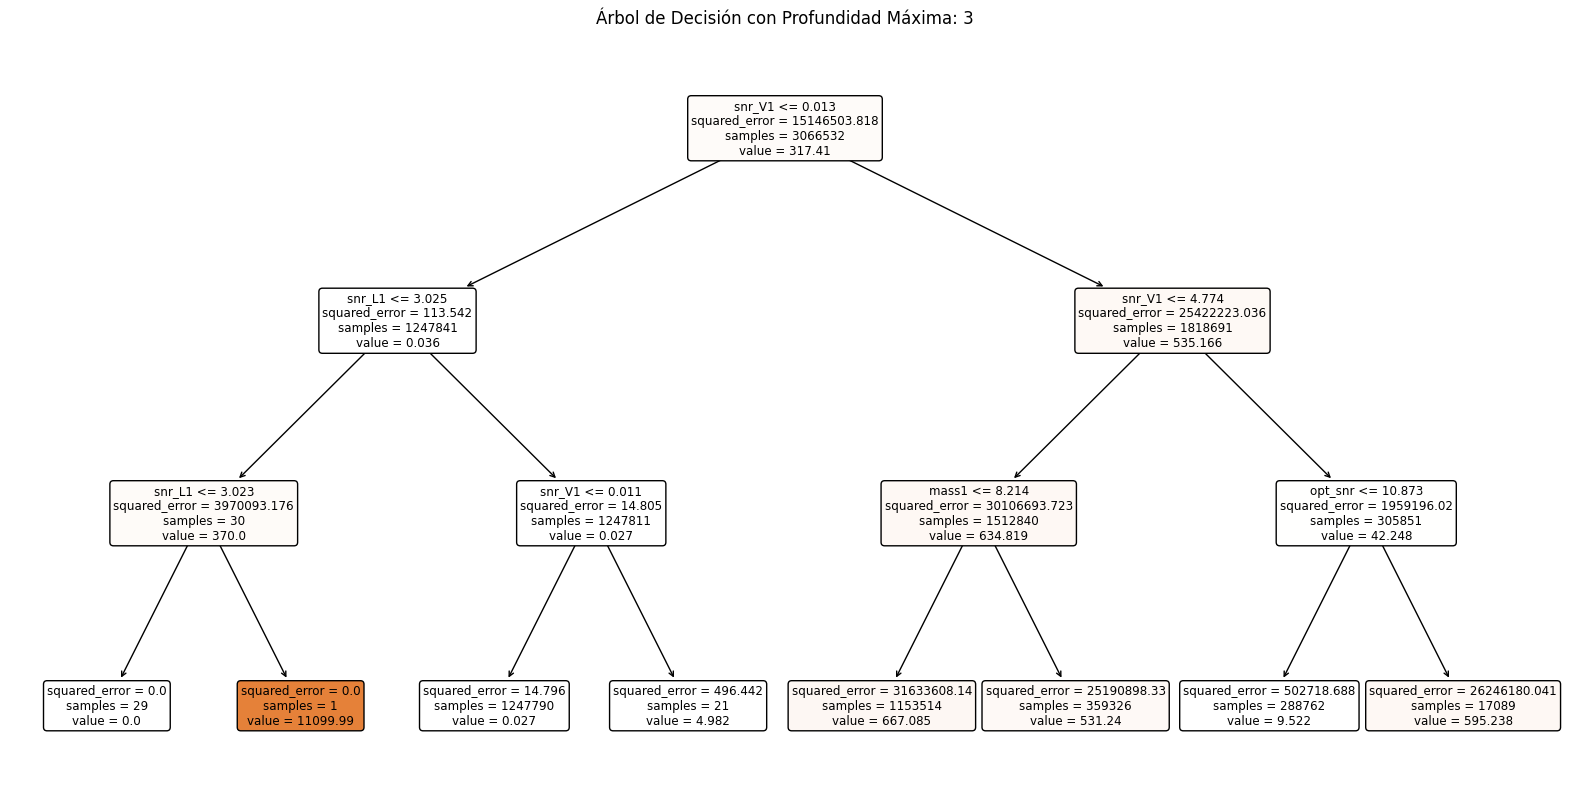

In [50]:
# Graph the decision tree
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=X.columns, rounded=True, impurity=True)
plt.title(f'Árbol de Decisión con Profundidad Máxima: {max_depth}')
plt.show()

In [51]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [81]:
'''# Graficar IFAR real vs. IFAR predicho
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color="blue", alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", linestyle="--")
plt.xlabel('IFAR Real')
plt.ylabel('IFAR Predicho')
plt.title(f'Comparación entre IFAR Real y Predicho (Profundidad Máxima: {max_depth})')
plt.show()'''

'# Graficar IFAR real vs. IFAR predicho\nplt.figure(figsize=(10, 6))\nsns.scatterplot(x=y_test, y=y_pred, color="blue", alpha=0.6)\nplt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", linestyle="--")\nplt.xlabel(\'IFAR Real\')\nplt.ylabel(\'IFAR Predicho\')\nplt.title(f\'Comparación entre IFAR Real y Predicho (Profundidad Máxima: {max_depth})\')\nplt.show()'

In [52]:
len(y_test)

766634

In [53]:
(y_test > 10).sum()

12800

In [54]:
(y_pred > ifar_threshold).sum()/len(y_test)*100

49.92486636387115

In [55]:
#mse_list = []
#rmse_list = []
#mae_list = []
#mape_list = []
#r2_list = []
#prediction_values_list = []

def train_decision_tree(X, y, max_depth, ifar_threshold=10):
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Report the current max_depth
    print(f"Entrenando modelo con max_depth={max_depth}")

    # Create and train the model
    model = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Calculate and store the custom prediction
    prediction_value = (y_pred > ifar_threshold).sum() / len(y_test) * 100

    # Store the metrics in their respective lists
    mse_list.append(mse)
    rmse_list.append(rmse)
    mae_list.append(mae)
    mape_list.append(mape)
    r2_list.append(r2)
    prediction_values_list.append(prediction_value)

    # Show results with comments specific to max_depth
    print(f"Predicción con max_depth={max_depth}: {prediction_value:.2f}%")
    print(f"MSE con max_depth={max_depth}: {mse:.4f}")
    print(f"RMSE con max_depth={max_depth}: {rmse:.4f}")
    print(f"MAE con max_depth={max_depth}: {mae:.4f}")
    print(f"MAPE con max_depth={max_depth}: {mape:.4f}")
    print(f"R^2 con max_depth={max_depth}: {r2:.4f}")
    print("-" * 40)

    # Return the model and metrics if necessary
    return model, mse, rmse, mae, mape, r2, prediction_value

In [56]:
# Rango de valores de max_depth: 1 a 5, luego 10, y de 10 en 10 hasta 100
mse_list = []
rmse_list = []
mae_list = []
mape_list = []
r2_list = []
prediction_values_list = []
max_depth_values = list(range(1, 6)) + [10] + list(range(20, 101, 10))

# Iterar sobre cada valor de max_depth y llamar a la función train_decision_tree
for max_depth in max_depth_values:
    train_decision_tree(X, y, max_depth, ifar_threshold=10)


Entrenando modelo con max_depth=1
Predicción con max_depth=1: 59.42%
MSE con max_depth=1: 15007347.8295
RMSE con max_depth=1: 3873.9318
MAE con max_depth=1: 620.4583
MAPE con max_depth=1: 1160645815341815808.0000
R^2 con max_depth=1: 0.0046
----------------------------------------
Entrenando modelo con max_depth=2
Predicción con max_depth=2: 59.43%
MSE con max_depth=2: 14977663.2689
RMSE con max_depth=2: 3870.0986
MAE con max_depth=2: 617.4585
MAPE con max_depth=2: 1359597856078599168.0000
R^2 con max_depth=2: 0.0066
----------------------------------------
Entrenando modelo con max_depth=3
Predicción con max_depth=3: 49.92%
MSE con max_depth=3: 14974666.3823
RMSE con max_depth=3: 3869.7114
MAE con max_depth=3: 617.1735
MAPE con max_depth=3: 1372118981648514816.0000
R^2 con max_depth=3: 0.0068
----------------------------------------
Entrenando modelo con max_depth=4
Predicción con max_depth=4: 49.93%
MSE con max_depth=4: 14975384.0745
RMSE con max_depth=4: 3869.8041
MAE con max_depth=

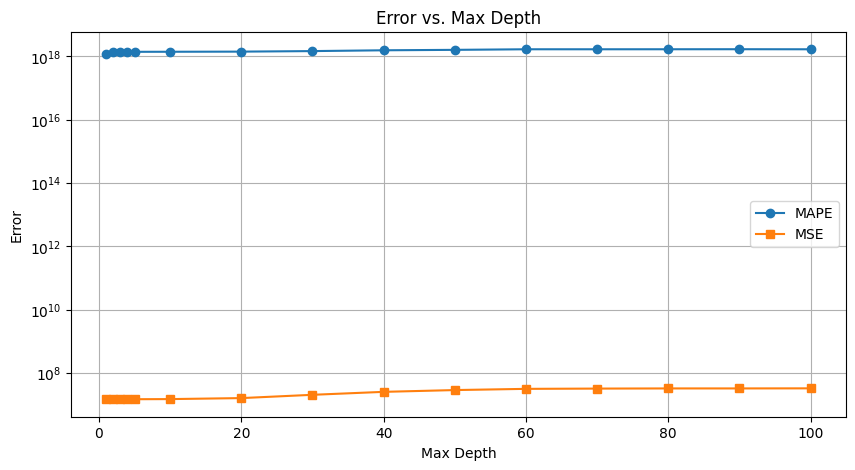

In [57]:
# Crear el gráfico
plt.figure(figsize=(10, 5))

plt.semilogy(max_depth_values, mape_list, label='MAPE', marker='o')
plt.semilogy(max_depth_values, mse_list, label='MSE', marker='s')

plt.xlabel('Max Depth')
plt.ylabel('Error')
plt.title('Error vs. Max Depth')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

# Model with all data

In [58]:
mse_list = []
rmse_list = []
mae_list = []
mape_list = []
r2_list = []
prediction_values_list = []
train_decision_tree(X, y, 100, ifar_threshold=10)

Entrenando modelo con max_depth=100
Predicción con max_depth=100: 2.01%
MSE con max_depth=100: 32999707.2808
RMSE con max_depth=100: 5744.5372
MAE con max_depth=100: 688.0599
MAPE con max_depth=100: 1648124488250952192.0000
R^2 con max_depth=100: -1.1888
----------------------------------------


(DecisionTreeRegressor(max_depth=100, random_state=42),
 32999707.280784003,
 5744.537168544042,
 688.05994477449,
 1.6481244882509522e+18,
 -1.1888110624624084,
 2.0059115562315264)

# Model with df_true only

In [59]:
X = df_true.drop('pycbc_ifar', axis=1)
y = df_true['pycbc_ifar']

In [60]:
X

,mass1,mass2,snr_H1,snr_L1,snr_V1,spin1z,spin2z,opt_snr
0,1.692460,0.501600,2.440571,2.957571,1.361124,-0.037187,0.007150,4.068939
1,6.421466,0.763863,2.684150,2.988815,1.259368,0.021298,0.038439,4.209951
2,10.481894,1.045793,4.408046,6.731172,1.315282,0.012784,-0.030501,8.152884
3,8.906005,0.811978,2.049177,3.539541,0.762279,-0.000504,-0.004068,4.160354
4,7.129897,0.808812,2.389652,3.215351,0.549881,-0.001127,-0.003302,4.043672
...,...,...,...,...,...,...,...,...
1916578,5.784159,0.559250,2.959844,2.958614,0.812961,-0.038265,-0.032295,4.263212
1916579,8.621294,0.868851,2.718237,3.586084,3.759479,0.032837,-0.010397,5.863658
1916580,10.560706,0.717379,3.402718,2.469075,1.012893,-0.029833,-0.031378,4.324439
1916581,5.727628,0.886952,2.854940,3.862371,0.634093,-0.024699,0.007844,4.844654


In [61]:
mse_list = []
rmse_list = []
mae_list = []
mape_list = []
r2_list = []
prediction_values_list = []
train_decision_tree(X, y, 100, ifar_threshold=10)

Entrenando modelo con max_depth=100
Predicción con max_depth=100: 4.00%
MSE con max_depth=100: 64484647.1472
RMSE con max_depth=100: 8030.2333
MAE con max_depth=100: 1357.5656
MAPE con max_depth=100: 3262562088914036736.0000
R^2 con max_depth=100: -1.1495
----------------------------------------


(DecisionTreeRegressor(max_depth=100, random_state=42),
 64484647.147242874,
 8030.2333183565015,
 1357.5656130739542,
 3.2625620889140367e+18,
 -1.1495208249701068,
 4.00269228862795)

In [ ]:
3061930444997202944.0000 > 1478736494772964352.0000

# Model with df_true['ifar']>10 only

In [63]:
df_true = df_true[df_true['pycbc_ifar'] > 10]
df_true

,mass1,mass2,pycbc_ifar,snr_H1,snr_L1,snr_V1,spin1z,spin2z,opt_snr
17,10.044697,0.771064,10174.474264,3.236697,3.959241,0.672289,0.003799,-0.034952,5.157884
39,9.871082,0.608848,10174.474264,4.944136,4.885376,2.291932,0.003390,0.002160,7.318766
45,6.012620,0.290126,10174.474264,3.138401,2.989728,0.665509,0.022516,0.025649,4.385309
52,1.566219,0.522978,10174.474264,3.554345,1.999399,1.121289,0.032162,-0.004396,4.229451
59,5.331335,0.458099,10174.474264,5.381416,5.130757,1.040995,-0.004934,0.009750,7.507861
...,...,...,...,...,...,...,...,...,...
1903266,6.626040,0.982731,69.997932,2.532026,3.325533,0.341978,-0.030900,-0.025199,4.193718
1903269,10.661847,0.462810,25146.646963,4.366187,6.194481,2.369776,0.011288,0.066585,7.940468
1903305,2.810979,0.813847,54.111754,6.184364,6.846928,3.077704,0.012777,-0.049325,9.726204
1903359,8.898606,0.641294,25146.646963,2.951985,3.437002,0.377267,-0.067872,-0.015317,4.546376


In [64]:
X = df_true.drop('pycbc_ifar', axis=1)
y = df_true['pycbc_ifar']

In [65]:
X

,mass1,mass2,snr_H1,snr_L1,snr_V1,spin1z,spin2z,opt_snr
17,10.044697,0.771064,3.236697,3.959241,0.672289,0.003799,-0.034952,5.157884
39,9.871082,0.608848,4.944136,4.885376,2.291932,0.003390,0.002160,7.318766
45,6.012620,0.290126,3.138401,2.989728,0.665509,0.022516,0.025649,4.385309
52,1.566219,0.522978,3.554345,1.999399,1.121289,0.032162,-0.004396,4.229451
59,5.331335,0.458099,5.381416,5.130757,1.040995,-0.004934,0.009750,7.507861
...,...,...,...,...,...,...,...,...
1903266,6.626040,0.982731,2.532026,3.325533,0.341978,-0.030900,-0.025199,4.193718
1903269,10.661847,0.462810,4.366187,6.194481,2.369776,0.011288,0.066585,7.940468
1903305,2.810979,0.813847,6.184364,6.846928,3.077704,0.012777,-0.049325,9.726204
1903359,8.898606,0.641294,2.951985,3.437002,0.377267,-0.067872,-0.015317,4.546376


In [66]:
mse_list = []
rmse_list = []
mae_list = []
mape_list = []
r2_list = []
prediction_values_list = []
max_depth_values = list(range(1, 6)) + [10] + list(range(20, 101, 10))

# Iterar sobre cada valor de max_depth y llamar a la función train_decision_tree
for max_depth in max_depth_values:
    train_decision_tree(X, y, max_depth, ifar_threshold=10)


Entrenando modelo con max_depth=1
Predicción con max_depth=1: 100.00%
MSE con max_depth=1: 553519029.1311
RMSE con max_depth=1: 23526.9851
MAE con max_depth=1: 17349.2130
MAPE con max_depth=1: 69.0873
R^2 con max_depth=1: -0.0000
----------------------------------------
Entrenando modelo con max_depth=2
Predicción con max_depth=2: 100.00%
MSE con max_depth=2: 553695872.4125
RMSE con max_depth=2: 23530.7431
MAE con max_depth=2: 17352.3297
MAPE con max_depth=2: 69.1581
R^2 con max_depth=2: -0.0004
----------------------------------------
Entrenando modelo con max_depth=3
Predicción con max_depth=3: 100.00%
MSE con max_depth=3: 553832736.9670
RMSE con max_depth=3: 23533.6512
MAE con max_depth=3: 17350.6767
MAPE con max_depth=3: 69.1704
R^2 con max_depth=3: -0.0006
----------------------------------------
Entrenando modelo con max_depth=4
Predicción con max_depth=4: 100.00%
MSE con max_depth=4: 554184172.4116
RMSE con max_depth=4: 23541.1166
MAE con max_depth=4: 17351.8351
MAPE con max_dep

In [67]:
len(max_depth_values), len(mape_list), len(mse_list)

(15, 15, 15)

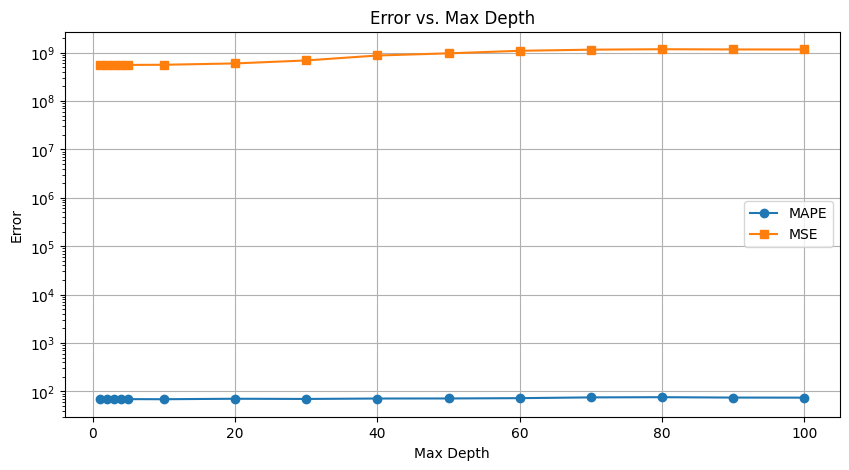

In [68]:
# Crear el gráfico
plt.figure(figsize=(10, 5))

plt.semilogy(max_depth_values, mape_list, label='MAPE', marker='o')
plt.semilogy(max_depth_values, mse_list, label='MSE', marker='s')

plt.xlabel('Max Depth')
plt.ylabel('Error')
plt.title('Error vs. Max Depth')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

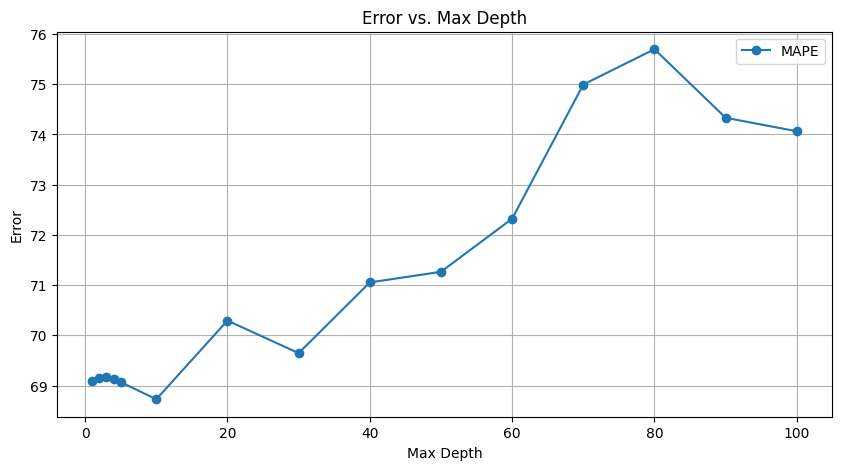

In [69]:
# Crear el gráfico
plt.figure(figsize=(10, 5))

plt.plot(max_depth_values, mape_list, label='MAPE', marker='o')
#plt.plot(max_depth_values, mse_list, label='MSE', marker='s')

plt.xlabel('Max Depth')
plt.ylabel('Error')
plt.title('Error vs. Max Depth')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

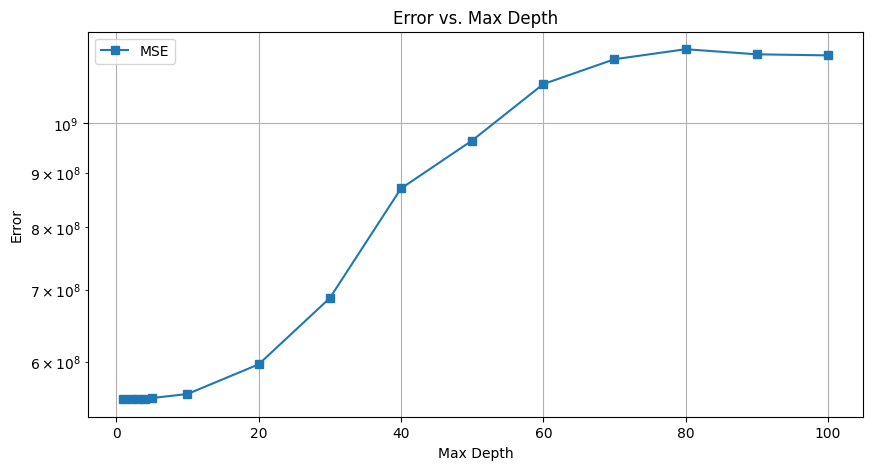

In [70]:
# Crear el gráfico
plt.figure(figsize=(10, 5))

#plt.plot(max_depth_values, mape_list, label='MAPE', marker='o')
plt.semilogy(max_depth_values, mse_list, label='MSE', marker='s')

plt.xlabel('Max Depth')
plt.ylabel('Error')
plt.title('Error vs. Max Depth')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

In [71]:
mse_list = []
rmse_list = []
mae_list = []
mape_list = []
r2_list = []
prediction_values_list = []
train_decision_tree(X, y, 100, ifar_threshold=10)

Entrenando modelo con max_depth=100
Predicción con max_depth=100: 100.00%
MSE con max_depth=100: 1156921000.5692
RMSE con max_depth=100: 34013.5414
MAE con max_depth=100: 22344.8283
MAPE con max_depth=100: 74.0640
R^2 con max_depth=100: -1.0902
----------------------------------------


(DecisionTreeRegressor(max_depth=100, random_state=42),
 1156921000.5692441,
 34013.541429396086,
 22344.828274985008,
 74.06401274115021,
 -1.0902039142472675,
 100.0)

# Model with df_true['ifar']>10 and  df_false['ifar']<10 only

In [72]:
df_false = df_false[df_false['pycbc_ifar'] < 10]

df_false = df_false.sample(n=63312, random_state=42)

df_false

,snr_H1,snr_L1,snr_V1,mass1,mass2,spin1z,spin2z,opt_snr,pycbc_ifar
454132,5.254604,5.747421,-1.000000,0.827982,0.252480,0.327381,0.094236,7.851351,0.000016
1093296,5.331875,5.557391,-1.000000,0.630962,0.212790,0.769499,-0.064221,7.766176,0.000343
1818994,6.982780,6.295191,-1.000000,0.915728,0.215410,0.853747,0.039416,9.454557,0.000007
1263156,5.310580,6.742177,-1.000000,1.790043,0.221186,-0.716699,0.050497,8.640556,0.000007
1675300,5.755121,7.025447,-1.000000,1.642320,0.240908,-0.573675,-0.076137,9.136647,0.000187
...,...,...,...,...,...,...,...,...,...
1669704,5.567437,6.912459,-1.000000,1.019191,0.200053,0.899962,0.099742,8.931878,0.000017
261168,6.197067,6.849734,-1.000000,3.268774,0.334625,-0.831912,-0.012210,9.290990,0.000351
458780,5.510390,5.168306,-1.000000,1.339582,0.287803,0.696538,0.090563,7.620747,0.000001
696421,5.282698,5.132589,-1.000000,0.842172,0.254508,0.216539,0.083963,7.433059,0.000033


In [73]:
df = pd.concat([df_true, df_false], axis=0)
df

,mass1,mass2,pycbc_ifar,snr_H1,snr_L1,snr_V1,spin1z,spin2z,opt_snr
17,10.044697,0.771064,10174.474264,3.236697,3.959241,0.672289,0.003799,-0.034952,5.157884
39,9.871082,0.608848,10174.474264,4.944136,4.885376,2.291932,0.003390,0.002160,7.318766
45,6.012620,0.290126,10174.474264,3.138401,2.989728,0.665509,0.022516,0.025649,4.385309
52,1.566219,0.522978,10174.474264,3.554345,1.999399,1.121289,0.032162,-0.004396,4.229451
59,5.331335,0.458099,10174.474264,5.381416,5.130757,1.040995,-0.004934,0.009750,7.507861
...,...,...,...,...,...,...,...,...,...
1669704,1.019191,0.200053,0.000017,5.567437,6.912459,-1.000000,0.899962,0.099742,8.931878
261168,3.268774,0.334625,0.000351,6.197067,6.849734,-1.000000,-0.831912,-0.012210,9.290990
458780,1.339582,0.287803,0.000001,5.510390,5.168306,-1.000000,0.696538,0.090563,7.620747
696421,0.842172,0.254508,0.000033,5.282698,5.132589,-1.000000,0.216539,0.083963,7.433059


In [74]:
X = df.drop('pycbc_ifar', axis=1)
y = df['pycbc_ifar']

In [75]:
mse_list = []
rmse_list = []
mae_list = []
mape_list = []
r2_list = []
prediction_values_list = []
train_decision_tree(X, y, 100, ifar_threshold=10)

Entrenando modelo con max_depth=100
Predicción con max_depth=100: 50.28%
MSE con max_depth=100: 598927524.1072
RMSE con max_depth=100: 24472.9958
MAE con max_depth=100: 11405.3859
MAPE con max_depth=100: 398084.0745
R^2 con max_depth=100: -0.6482
----------------------------------------


(DecisionTreeRegressor(max_depth=100, random_state=42),
 598927524.1072013,
 24472.995813900703,
 11405.385876420802,
 398084.0745274911,
 -0.6482290300142395,
 50.27838104639684)